Wrote sample CSV -> stations.csv
saved transformed stations -> stations_transformed.csv


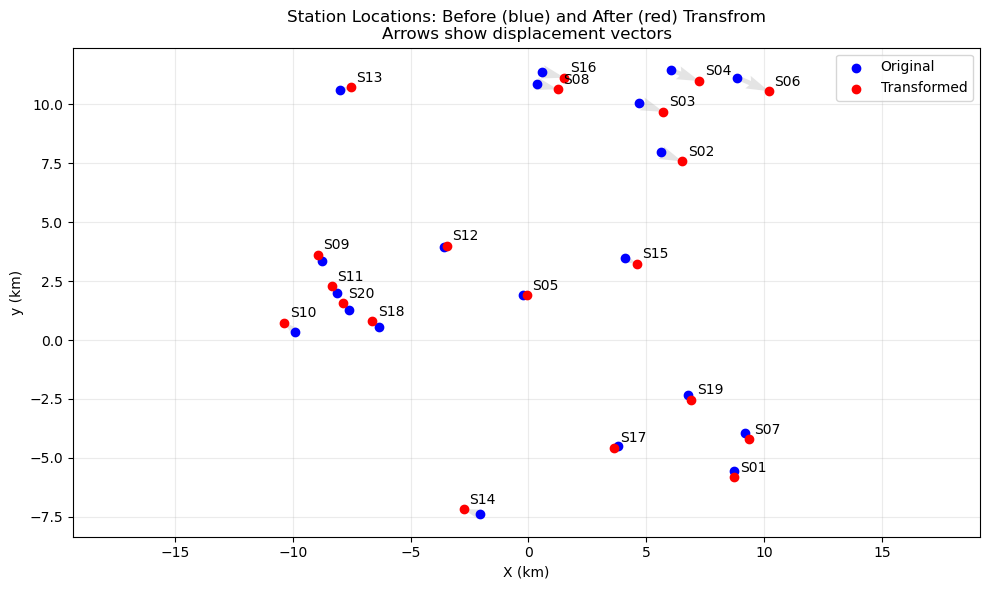


Displacement stats (meters):
count      20.000000
mean      593.538042
std       400.092837
min       145.988988
25%       310.503636
50%       428.032772
75%       930.773601
max      1453.846223
Name: disp_magnitude_m, dtype: float64

Top 5 largest displacements:
   station  disp_magnitude_m     dx_km     dy_km
5      S06       1453.846223  1.334291 -0.577354
3      S04       1306.425122  1.218691 -0.470680
2      S03       1110.468719  1.040129 -0.388938
1      S02        994.023590  0.917125 -0.383361
15     S16        972.686041  0.939744 -0.250997


In [112]:
# geology_transform_demo.py
# Small demo: read station locations from CSV, apply a 2x2 tectonic transform,
# save transformed coordinates, and plot before/after with displacement vectors.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------
# 1) Create (or overwrite) a sample CSV of station points
# -------------------------
sample_csv = "stations.csv"
sample_df = pd.DataFrame({
    "station": [f"S{i}" for i in range(1, 21)],
    # sample coordinates in kilometers (for example)
    "x_km": np.random.uniform(-10, 10, 20), #(bottom range limit, top range limit, number of numbers to generate)
    "y_km": np.random.uniform(-8, 12, 20),
    # some extra columns geologists often have
    "elevation_m": np.random.uniform(0, 200, 20),
    "obs_time_yr": np.repeat(0.0, 20)  # baseline time - for np.reat - we give reapted number and number of times we want it to generate
})
sample_df.to_csv(sample_csv, index=False)
print(f"Wrote sample CSV -> {sample_csv}") 

f = pd.read_csv(sample_csv)
#print("Head of dataframe:")
#print(df.head(30))

# -------------------------
# 3) Define a 2x2 tectonic transformation matrix
#    Interpretations:
#      - diagonal >1 stretches (extension) in x/y
#      - off-diagonals introduce shear/rotation
#    Example matrix mixing stretch + shear (units: dimensionless)
# -------------------------
# Example: moderate extension in x (1.05), slight contraction in y (0.98), and shear
m = np.array([[1.05, 0.08],
              [-0.04, 0.98]])


points = np.vstack([df["x_km"].values,df["y_km"].values]) #generate x,y points for our locations
transformed_points = m @ points #apply transform 

# Put transformed coordinates back into a new DataFrame columns (in km)
df["x_km_trans"] = transformed_points[0, :]
df["y_km_trans"] = transformed_points[1, :]

# Compute displacement vectors (in m)
df["dx_km"] = df["x_km_trans"] - df["x_km"]
df["dy_km"] = df["y_km_trans"] - df["y_km"]
df["disp_magnitude_m"] = np.sqrt(df["dx_km"]**2 + df["dy_km"]**2) * 1000 # in meters

# Save transformed data
out_csv = "stations_transformed.csv"
df.to_csv(out_csv, index=False)
print(f"saved transformed stations -> {out_csv}")

#5 Plot before vs after with displacement arrows (quiver)

fig, ax = plt.subplots(figsize=(10,6))

# Plot original points
ax.scatter(df["x_km"],df["y_km"], color = "b", label = "Original", zorder = 3) # zorder dictates layering of objects in plot

# Plot transformed ploints
ax.scatter(df["x_km_trans"],df["y_km_trans"], color="r", label = "Transformed", zorder = 3)

# Plot transform vectors --> transformed (scale=1 becuase units are km; adjust if needed)
ax.quiver(df["x_km"], df["y_km"], df["dx_km"], df["dy_km"], # first coordinates are start xy and next are end xy. Choose difference xy because we are starting from first vector, not the origin.
          angles="xy", scale_units="xy", scale=1, color="lightgray", width=0.005, alpha=0.6)

# Axes and Labels
ax.set_xlabel("X (km)")
ax.set_ylabel("y (km)")
ax.set_title("Station Locations: Before (blue) and After (red) Transfrom\nArrows show displacement vectors") # \n creates an "enter"
ax.legend()
ax.axis("equal")
ax.grid(alpha=0.25)

# Optionally annotate large displacements
threshold_m = 20 # meters - annotates stations with > threshold magnitude
big = df[df["disp_magnitude_m"] > threshold_m]
for _, row in big.iterrows():
    ax.annotate(row["station"], (row["x_km_trans"], row["y_km_trans"]), textcoords="offset points", xytext=(4,4))

plt.tight_layout()
plt.show()

# Summary of stats
print("\nDisplacement stats (meters):")
print(df["disp_magnitude_m"].describe())

#Example: List top 5 largest displacements:")
print("\nTop 5 largest displacements:")
print(df.sort_values("disp_magnitude_m", ascending=False)[["station", "disp_magnitude_m", "dx_km", "dy_km"]].head())




In [116]:
import numpy as np

a = np.array([2,5])

m = [[-1,1],
     [1,1]]

product = m @ a
print(product)

[3 7]
